# Minimal OpenSCM-Runner example with FaIR

Requires fair >= 1.6.0c3 and < 2.0.0

In [1]:
# NBVAL_IGNORE_OUTPUT
import openscm_runner

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/openscm-runner-zn/src/openscm_runner/progress.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# NBVAL_IGNORE_OUTPUT
openscm_runner.__version__

'0.3.1+285.g2dff829.dirty'

In [3]:
import os.path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyam
from fair.forward import fair_scm
from fair.ancil import natural, cmip6_solar, cmip6_volcanic
from scmdata import ScmRun
from tqdm import tqdm_notebook

from openscm_runner.run import run
from openscm_runner.adapters import FAIR
from openscm_runner.utils import calculate_quantiles

In [4]:
fair = FAIR()

In [5]:
# NBVAL_IGNORE_OUTPUT
fair.get_version()

'1.6.2'

In [6]:
# NBVAL_IGNORE_OUTPUT
df_fair = ScmRun(
    os.path.join(
        "..", "tests", "test-data", "rcmip_scen_ssp_world_emissions.csv"
    ),
    lowercase_cols=True,
)

df_fair.head(30)

time                                                                                                    2015-01-01  \
model   region scenario                  unit             variable                                                   
AIM/CGE World  ssp370                    Mt BC/yr         Emissions|BC                                    9.727424   
                                         kt C2F6/yr       Emissions|C2F6                                  1.570000   
                                         kt C6F14/yr      Emissions|C6F14                                 0.350000   
                                         kt CF4/yr        Emissions|CF4                                  10.869900   
                                         Mt CH4/yr        Emissions|CH4                                 388.072796   
                                         Mt CO/yr         Emissions|CO                                  934.349885   
                                         Mt CO2/yr        Emissions|CO2|MAGICC AFOLU                   3517.440000   
                                                          Emissions|CO2|MAGICC Fossil and Industrial  35635.286298   
                                         kt HFC125/yr     Emissions|HFC125                               78.790600   
                                         kt HFC134a/yr    Emissions|HFC134a                             201.953400   
                                         kt HFC143a/yr    Emissions|HFC143a                              32.381000   
                                         kt HFC227ea/yr   Emissions|HFC227ea                              3.663300   
                                         kt HFC23/yr      Emissions|HFC23                                14.485700   
                                         kt HFC245fa/yr   Emissions|HFC245fa                             11.728500   
                                         kt HFC32/yr      Emissions|HFC32                                38.579200   
                                         kt HFC4310mee/yr Emissions|HFC4310mee                            1.151600   
                                         kt N2O/yr        Emissions|N2O                               10900.000000   
                                         Mt NH3/yr        Emissions|NH3                                  65.279703   
                                         Mt NOx/yr        Emissions|NOx                                 155.520450   
                                         Mt OC/yr         Emissions|OC                                   34.746024   
                                         kt SF6/yr        Emissions|SF6                                   8.020000   
                                         Mt SO2/yr        Emissions|Sulfur                              100.771167   
                                         Mt VOC/yr        Emissions|VOC                                 227.244819   
               ssp370-lowNTCF-aerchemmip Mt BC/yr         Emissions|BC                                    9.727424   
                                         kt C2F6/yr       Emissions|C2F6                                  1.570000   
                                         kt C6F14/yr      Emissions|C6F14                                 0.350000   
                                         kt CF4/yr        Emissions|CF4                                  10.869900   
                                         Mt CH4/yr        Emissions|CH4                                 388.072796   
                                         Mt CO/yr         Emissions|CO                                  934.349885   
                                         Mt CO2/yr        Emissions|CO2|MAGICC AFOLU                   3517.440000   

time                                                                                                    2020-01-01  \
model   region scenario                  unit             variable                                       

In [7]:
# NBVAL_IGNORE_OUTPUT
x = run(
    climate_models_cfgs={
        "FAIR": [
            {},  # passing an empty list of an empty dict will run with defaults
            {"q": np.array([0.3, 0.45]), "r0": 30.0, "lambda_global": 0.9},
            {"q": np.array([0.35, 0.4]), "r0": 25.0, "lambda_global": 1.1},
        ],
    },
    scenarios=df_fair,
    output_variables=(
        "Surface Air Temperature Change",
        "Atmospheric Concentrations|CO2",
        "Effective Radiative Forcing",
        "Effective Radiative Forcing|CO2",
        "Effective Radiative Forcing|Aerosols",
        "Effective Radiative Forcing|Aerosols|Direct Effect|BC",
        "Effective Radiative Forcing|Aerosols|Direct Effect|OC",
        "Effective Radiative Forcing|Aerosols|Direct Effect|SOx",
        "Effective Radiative Forcing|Aerosols|Direct Effect",
        "Effective Radiative Forcing|Aerosols|Indirect Effect",
    ),
)

Climate models:   0%|          | 0.00/1.00 [00:00<?, ?it/s]

Creating FaIR emissions inputs:   0%|          | 0.00/10.0 [00:00<?, ?it/s]

Front serial:   0%|          | 0.00/3.00 [00:00<?, ?it/s]

Front parallel:   0%|          | 0.00/2.00 [00:00<?, ?it/s]

Parallel runs:   0%|          | 0.00/25.0 [00:00<?, ?it/s]

Note in the plots below that 'model' is the IAM that produced the scenario. In all cases, the climate model is FaIR.

In [8]:
# NBVAL_IGNORE_OUTPUT
x.get_unique_meta("climate_model", no_duplicates=True)

'FaIRv1.6.2'

In [9]:
plot_kwargs = dict(
    quantiles_plumes=[((0.05, 0.95), 0.5), ((0.5,), 1.0)],
    quantile_over="run_id",
    hue_var="scenario",
    style_var="model",
    style_label="IAM",
    time_axis="year",
)

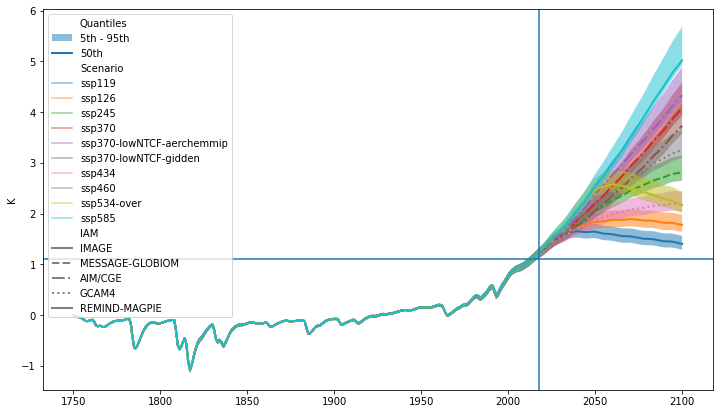

In [10]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Surface Air Temperature Change").plumeplot(
    ax=ax, **plot_kwargs
)
ax.axhline(1.1)
ax.axvline(2018)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f532cfb6150>,
  <matplotlib.lines.Line2D at 0x7f532d33fc10>])

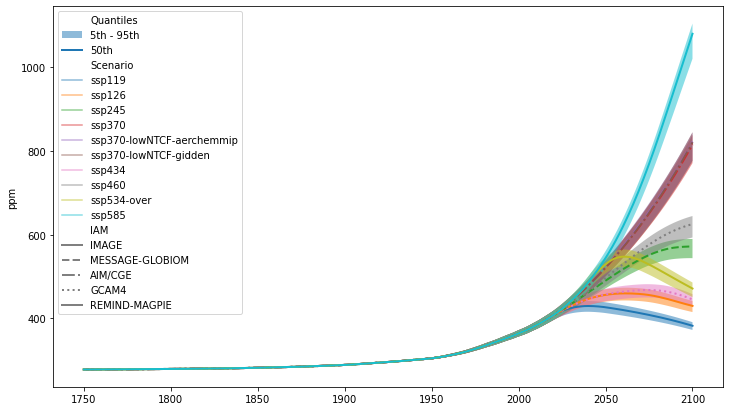

In [11]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Atmospheric Concentrations|CO2").plumeplot(
    ax=ax, **plot_kwargs
)

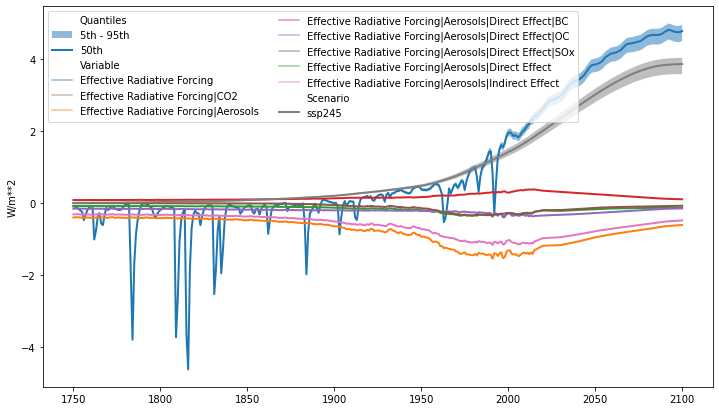

In [12]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
ax, legend_items = x.filter(
    variable="Effective Radiative Forcing*", scenario="ssp245"
).plumeplot(
    quantiles_plumes=[((0.05, 0.95), 0.5), ((0.5,), 1.0)],
    quantile_over="run_id",
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
    ax=ax,
    time_axis="year",
)
ax.legend(handles=legend_items, ncol=2, loc="upper left")

In [13]:
# NBVAL_IGNORE_OUTPUT
x.filter(
    variable="Surface Air Temperature Change", year=2100, scenario=["ssp126"]
).values.max()

2.003964892582417

In [14]:
# NBVAL_IGNORE_OUTPUT
x.filter(
    variable="Surface Air Temperature Change", year=2100, scenario=["ssp126"]
).values.min()

1.625501791450651

In [15]:
# NBVAL_IGNORE_OUTPUT
x.filter(
    variable="Surface Air Temperature Change", year=2100, scenario=["ssp370"]
).values.max()

4.645930053607998

In [16]:
# NBVAL_IGNORE_OUTPUT
x.filter(
    variable="Surface Air Temperature Change", year=2100, scenario=["ssp370"]
).values.min()

3.927009494889872

In [17]:
quantiles = calculate_quantiles(x, [0.05, 0.17, 0.5, 0.83, 0.95])

In [18]:
# NBVAL_IGNORE_OUTPUT
quantiles.filter(
    variable="Surface Air Temperature Change",
    year=2100,
    scenario=["ssp126"],
    quantile=0.05,
).values[0][0]

1.6410216803643207

In [19]:
# NBVAL_IGNORE_OUTPUT
quantiles.filter(
    variable="Surface Air Temperature Change",
    year=2100,
    scenario=["ssp126"],
    quantile=0.95,
).values[0][0]

1.9816384713829103

In [20]:
# NBVAL_IGNORE_OUTPUT
quantiles.filter(
    variable="Surface Air Temperature Change",
    year=2100,
    scenario=["ssp370"],
    quantile=0.05,
).values[0][0]

3.9423565896934463

In [21]:
# NBVAL_IGNORE_OUTPUT
quantiles.filter(
    variable="Surface Air Temperature Change",
    year=2100,
    scenario=["ssp370"],
    quantile=0.95,
).values[0][0]

4.589385092539759